In [1]:
import csv
import pandas as pd
import jieba

In [2]:
df_news = pd.read_csv('data/result_Weibo_hot_1h.csv', encoding='utf-8').dropna() #读取数据集1，并去除空值
df_news

,content
0,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr..."
1,昨天的几乎所有舆论钧正平，最高检，半月谈、人民网、人民日报、光明日报、瞭望、新华网、环球网、...
2,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr..."
3,“买包混入贵妇圈最终逆袭”的可行性版本，我觉得大概应该是这样的：<br><br>顾佳砸锅卖铁...
4,"<a suda-uatrack=\""key=tblog_card&amp;value=cli..."
...,...
18424,几个月来第一次被伤到。我觉得也应该被伤【大账户】小账户还是红的。没什么好责备自己的。市场里面...
18425,"<a target=""_blank"" render=""ext"" suda-uatrack=""..."
18426,"<a target=""_blank"" render=""ext"" suda-uatrack=""..."
18427,小白必备｜软到不知所措｜无油牛乳哈斯面包<br>如果你问我小白必做的面包，哈斯面包一定要拥有...


In [2]:
content = df_news.content.values.tolist()
content[0]

'【<a target=\\"_blank\\" render=\\"ext\\" suda-uatrack=\\"key=topic_click&amp;value=click_topic\\" class=\\"a_topic\\" extra-data=\\"type=topic\\" href=\\"//s.weibo.com/weibo?q=%23%E5%88%AB%E5%A2%85%E8%A2%AB%E4%BE%B5%E5%8D%A0%E6%8B%8D%E5%89%A7%E6%88%BF%E4%B8%BB%E7%B4%A2%E8%B5%94300%E4%B8%87%23&amp;from=default\\">#别墅被侵占拍剧房主索赔300万#</a>】2019年9月底，林女士看电视剧时无意间发现自家位于宁波慈溪的别墅出现在了该电视剧里。林女士于是将别墅前后期的两个物业公司、开发商宁波相原和景房地产开发有限公司、电视剧出品方爱奇艺平台告上法庭。记者了解到，目前林女士的的诉求有这几点，一是电视剧下架，或者将电视剧中涉及到其别墅的镜头删除；二是赔礼道歉；三是赔偿损失，目前预估为300万，包括财产损失和侵犯隐私权。7月21日上午，紫牛新闻联系上林女士（化名）的代理律师王勤保了解情况，他说，目前该案件已经在3月开庭，7月庭前会议，现进行到证据交换阶段。<a suda-uatrack=\\"key=tblog_card&amp;value=click_title:4529371177551197:1034-video:1034%3A4529218365620234:getlongtext:1618051664:4529371177551197:1618051664\\" title=\\"紫牛新闻的微博视频\\" href=\\"http://t.cn/A6yupTkq\\" alt=\\"http://t.cn/A6yupTkq\\" action-type=\\"feed_list_url\\" target=\\"_blank\\" rel=\\"noopener noreferrer\\"><i class=\\"W_ficon ficon_cd_video\\">L</i>紫牛新闻的微博视频</a>'

In [3]:
content_all_segment = []
for content_each in content:
    try:
        content_each_segment = jieba.lcut(content_each)
        if len(content_each_segment) > 1 and content_each_segment != '\r\n':
            content_all_segment.append(content_each_segment)
        else:
            print(content_each_segment)
    except:
        print(content_each, ' fail to cut')
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\11578\AppData\Local\Temp\jieba.cache
Loading model cost 1.384 seconds.
Prefix dict has been built successfully.


In [4]:
df_content=pd.DataFrame({'content_all_segment':content_all_segment})
df_content

,content_all_segment
0,"[【, <, a, , target, =, \, "", _, blank, \, "", ..."
1,"[昨天, 的, 几乎, 所有, 舆论, 钧, 正平, ，, 最高检, ，, 半月谈, 、, ..."
2,"[【, <, a, , target, =, \, "", _, blank, \, "", ..."
3,"[“, 买包, 混入, 贵妇, 圈, 最终, 逆袭, ”, 的, 可行性, 版本, ，, 我..."
4,"[<, a, , suda, -, uatrack, =, \, "", key, =, t..."
...,...
18418,"[几个, 月, 来, 第一次, 被, 伤到, 。, 我, 觉得, 也, 应该, 被, 伤, ..."
18419,"[<, a, , target, =, "", _, blank, "", , render..."
18420,"[<, a, , target, =, "", _, blank, "", , render..."
18421,"[小白, 必备, ｜, 软到, 不知所措, ｜, 无油, 牛乳, 哈斯, 面包, <, br..."


In [5]:
stopwords = pd.read_csv("data/data_stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords = stopwords.append(pd.read_csv("data/data_stopwords_Weibo.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8'))
stopwords

,stopword
0,!
1,""""
2,#
3,$
4,%
...,...
31,问
32,网页
33,中
34,搞笑


In [6]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords or not '\u4e00' <= word <= '\u9fff':
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

stopwords = stopwords.stopword.values.tolist()
contents_all_segment_clean, contents_all_words = drop_stopwords(content_all_segment,stopwords)

In [7]:
df_contents_all_segment_clean=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean})
df_contents_all_segment_clean

,contents_all_segment_clean
0,"[别墅, 侵占, 拍剧, 房主, 索赔, 万, 月底, 林, 女士, 电视剧, 无意间, 发..."
1,"[昨天, 舆论, 钧, 正平, 最高检, 半月谈, 人民网, 人民日报, 光明日报, 瞭望,..."
2,"[美国, 新冠, 肺炎, 确诊, 超, 万例, 特朗普, 呼吁, 美国, 戴, 口罩, 美国..."
3,"[买包, 混入, 贵妇, 圈, 最终, 逆袭, 可行性, 版本, 顾佳, 砸锅卖铁, 买, ..."
4,"[山猫, 科普, 山猫, 科普, 山猫, 科普, 初三, 男孩, 放弃, 中考, 捐髓, 救..."
...,...
18418,"[几个, 第一次, 伤到, 伤, 账户, 账户, 红, 没什么, 责备, 市场, 踏空, 狗..."
18419,"[华为, 华为, 终于, 出手, 华为, 加拿大, 法院, 申请, 中止, 孟晚, 舟, 引..."
18420,"[贵州, 身边, 事, 高考, 贵州, 高考, 分数线, 公布, 一本, 线, 文科, 理科..."
18421,"[小白, 必备, 软到, 不知所措, 无油, 牛乳, 哈斯, 面包, 小白必, 面包, 哈斯..."


In [8]:
df_contents_all_words=pd.DataFrame({'contents_all_words':contents_all_words})
df_contents_all_words

,contents_all_words
0,别墅
1,侵占
2,拍剧
3,房主
4,索赔
...,...
452248,熟悉
452249,张起
452250,灵
452251,按倒


In [9]:
df_contents_all_words['count'] = ''
words_count = df_contents_all_words.pivot_table(['count'],index = 'contents_all_words', aggfunc = 'count').reset_index().sort_values(by = 'count', axis = 0, ascending = False)
words_count.head(10)

,contents_all_words,count
3040,中国,1700
15977,喜欢,1282
48925,美国,1177
41320,爱,1043
29344,拍,957
32926,时间,776
42933,生活,752
31967,新,744
32163,新闻,697
63152,高考,672


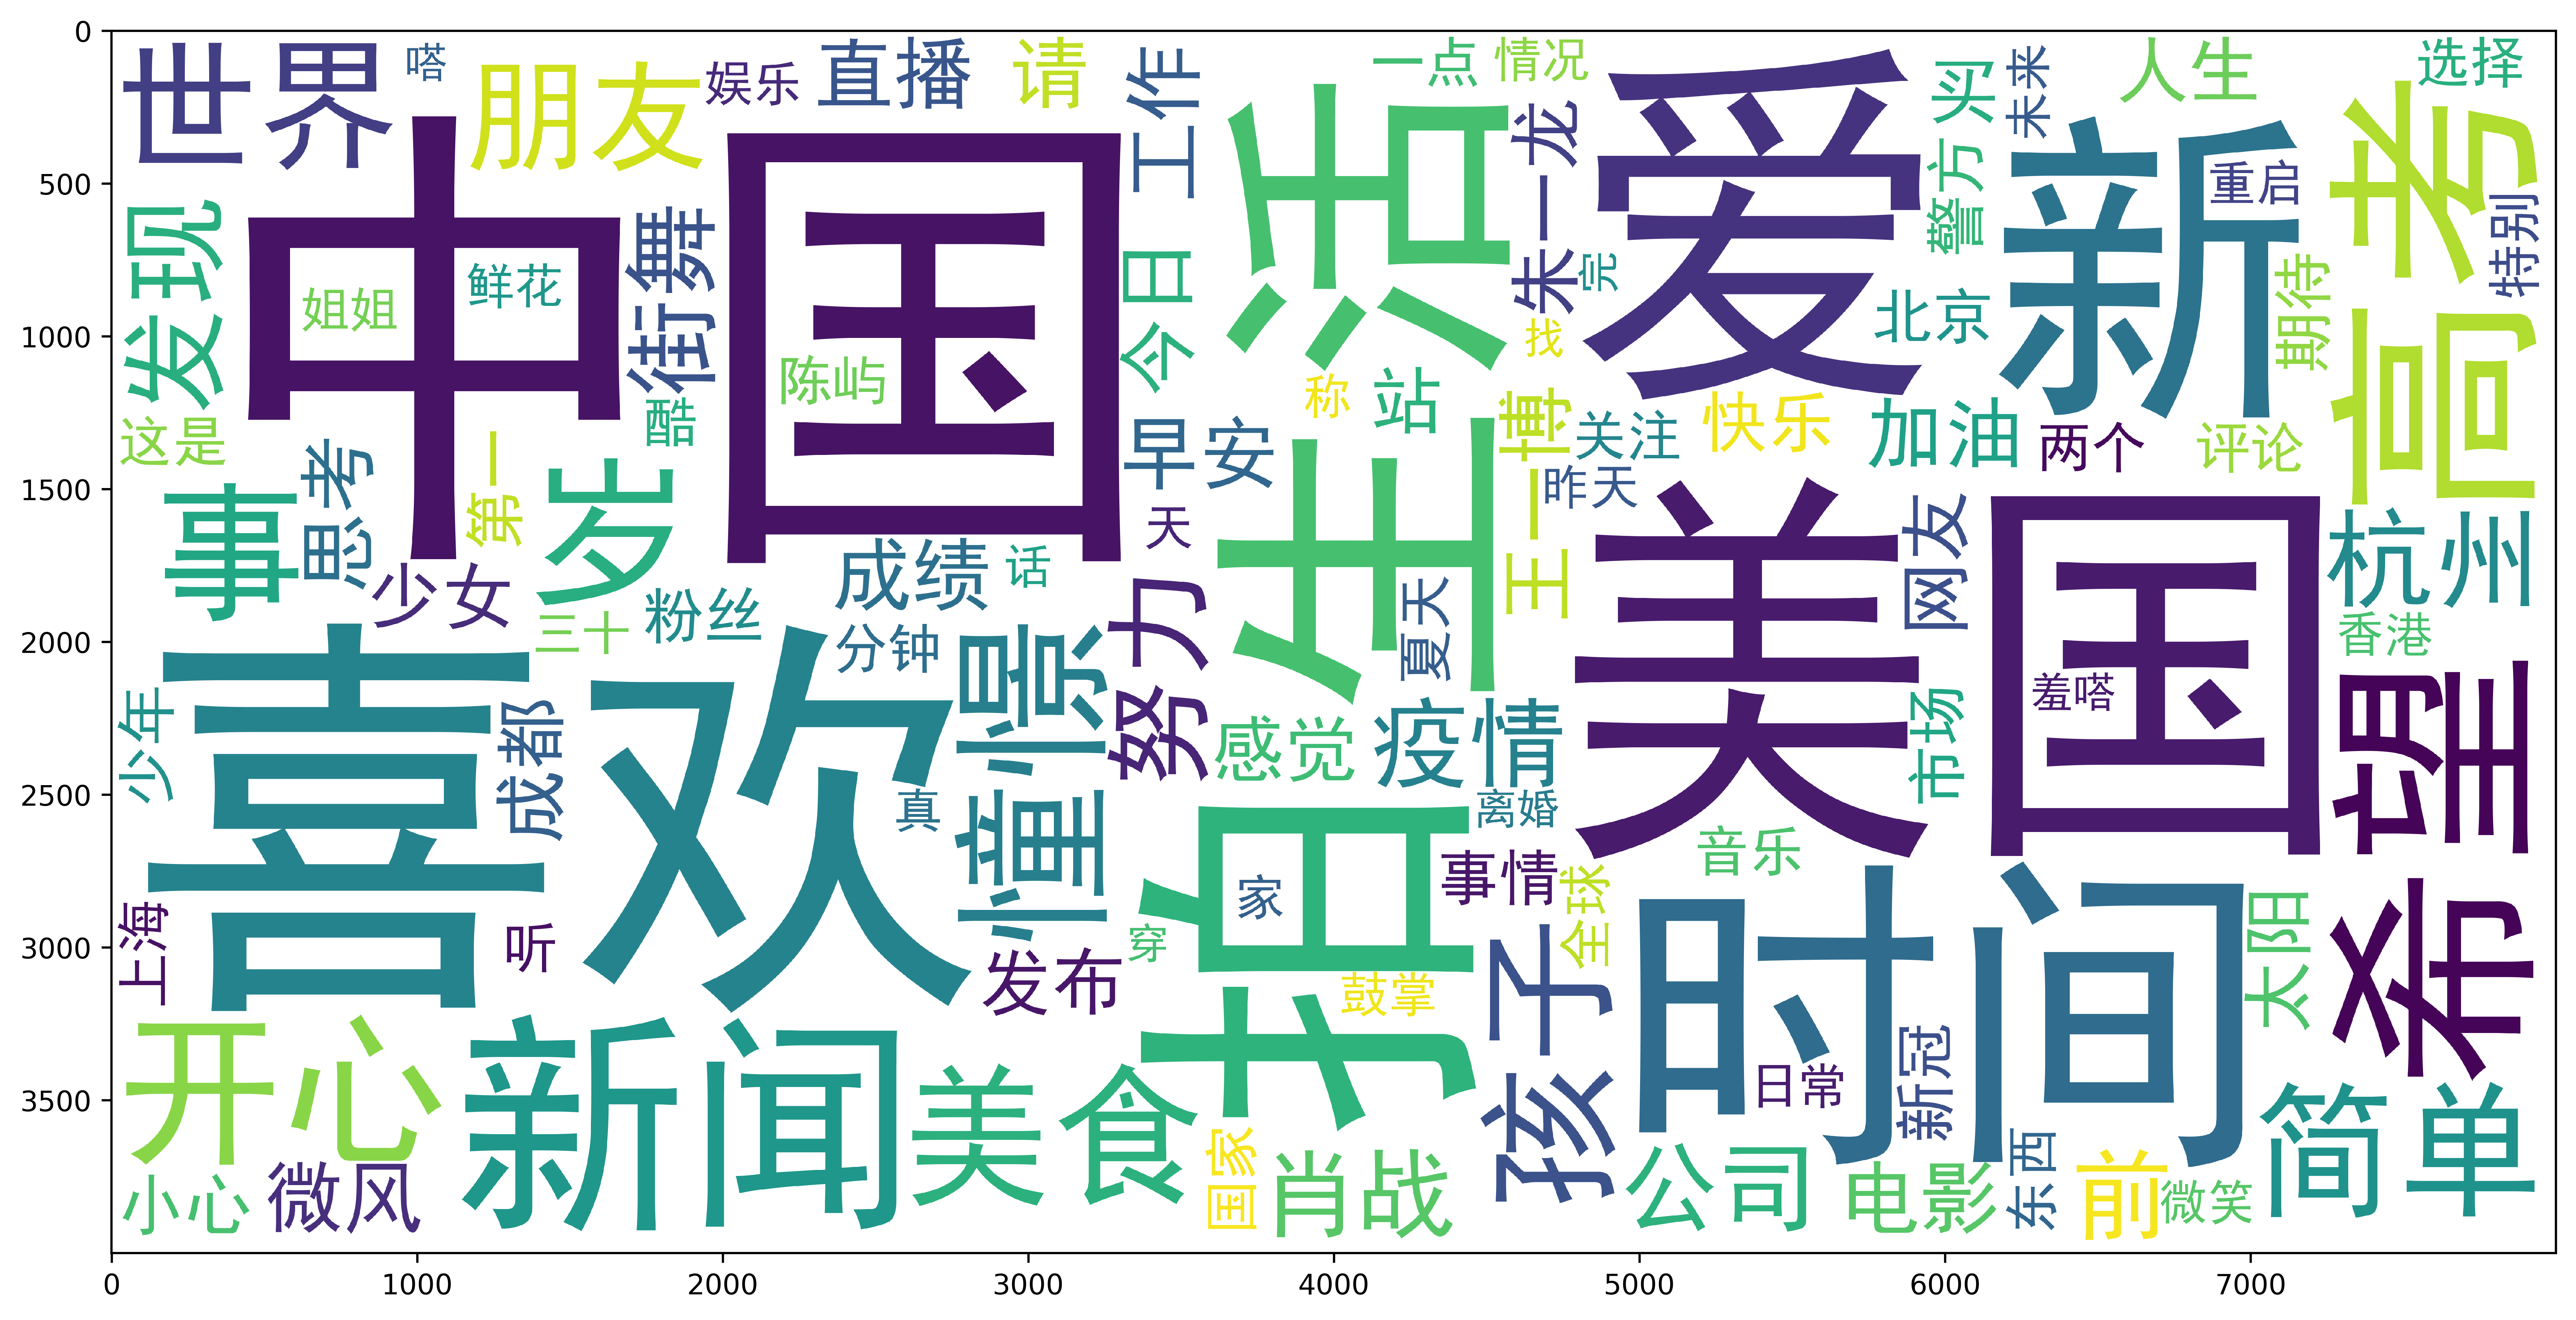

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16, 8), dpi = 600)
model_wordcloud=WordCloud(font_path=r"c:\windows\fonts\simhei.ttf",background_color="white",max_font_size=80, scale=20)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=model_wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()

In [11]:
from gensim import corpora
import gensim

In [13]:
texts=[['美国','中国','关系','美国'],['美国','疫情','疫情'],['中国', '疫情'], ['疫情']]
dictionary = corpora.Dictionary(texts)
for key, value in dictionary.iteritems():
    print(key, value)

0 中国
1 关系
2 美国
3 疫情


In [14]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 2)], [(2, 1), (3, 2)], [(0, 1), (3, 1)], [(3, 1)]]

In [15]:
dictionary = corpora.Dictionary(contents_all_segment_clean)
corpus = [dictionary.doc2bow(contents_each_segment_clean) for contents_each_segment_clean in contents_all_segment_clean]

In [16]:
corpus[0][:5]
#第一条微博的前五个词袋模型

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]

In [16]:
model_lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

In [17]:
for topic in model_lda.print_topics(num_topics=5, num_words=10):
    print(topic)

(0, '0.004*"生活" + 0.004*"吴邪" + 0.004*"张起" + 0.004*"喜欢" + 0.004*"灵" + 0.003*"事" + 0.003*"努力" + 0.003*"工作" + 0.003*"孩子" + 0.003*"第一"')
(1, '0.005*"憧憬" + 0.004*"舞台" + 0.004*"北京" + 0.004*"新闻" + 0.004*"美国" + 0.004*"姐姐" + 0.004*"新" + 0.004*"直播" + 0.003*"喜欢" + 0.003*"中国"')
(2, '0.007*"高考" + 0.005*"市场" + 0.004*"开心" + 0.004*"分数线" + 0.003*"巨巨" + 0.003*"成绩" + 0.003*"爱" + 0.003*"给力" + 0.003*"分钟" + 0.003*"少年"')
(3, '0.016*"美国" + 0.015*"中国" + 0.007*"驻" + 0.006*"关闭" + 0.005*"成都" + 0.005*"酷" + 0.003*"淘汰" + 0.003*"总领事馆" + 0.003*"姐姐" + 0.003*"孟佳"')
(4, '0.008*"杭州" + 0.005*"警方" + 0.005*"成都" + 0.005*"美食" + 0.004*"失踪案" + 0.004*"通报" + 0.004*"拍" + 0.004*"微风" + 0.003*"丈夫" + 0.003*"污"')


In [18]:
df_contents_all_segment_clean

,contents_all_segment_clean
0,"[别墅, 侵占, 拍剧, 房主, 索赔, 万, 月底, 林, 女士, 电视剧, 无意间, 发..."
1,"[昨天, 舆论, 钧, 正平, 最高检, 半月谈, 人民网, 人民日报, 光明日报, 瞭望,..."
2,"[美国, 新冠, 肺炎, 确诊, 超, 万例, 特朗普, 呼吁, 美国, 戴, 口罩, 美国..."
3,"[买包, 混入, 贵妇, 圈, 最终, 逆袭, 可行性, 版本, 顾佳, 砸锅卖铁, 买, ..."
4,"[山猫, 科普, 山猫, 科普, 山猫, 科普, 初三, 男孩, 放弃, 中考, 捐髓, 救..."
...,...
18418,"[几个, 第一次, 伤到, 伤, 账户, 账户, 红, 没什么, 责备, 市场, 踏空, 狗..."
18419,"[华为, 华为, 终于, 出手, 华为, 加拿大, 法院, 申请, 中止, 孟晚, 舟, 引..."
18420,"[贵州, 身边, 事, 高考, 贵州, 高考, 分数线, 公布, 一本, 线, 文科, 理科..."
18421,"[小白, 必备, 软到, 不知所措, 无油, 牛乳, 哈斯, 面包, 小白必, 面包, 哈斯..."


In [19]:
news_topics = model_lda.get_document_topics(corpus[:5])
for topic in news_topics:
    print(topic)
for i in range(len(news_topics)):
    print('第{}条博文大概率类别为：'.format(i), max(news_topics[i], key = lambda x: x[1])[0])

[(0, 0.27705988), (1, 0.18118459), (3, 0.22090727), (4, 0.31811753)]
[(0, 0.083242536), (1, 0.34673923), (2, 0.40384525), (3, 0.16389051)]
[(1, 0.99295604)]
[(0, 0.9422411), (1, 0.032344054), (2, 0.010823464), (3, 0.013928126)]
[(0, 0.06480118), (1, 0.16116938), (2, 0.42731264), (3, 0.010121678), (4, 0.33659515)]
第0条博文大概率类别为： 4
第1条博文大概率类别为： 2
第2条博文大概率类别为： 1
第3条博文大概率类别为： 0
第4条博文大概率类别为： 2


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["美国 中国 关系","美国 疫情","中国 疫情 中国", "疫情"]
model_cv = CountVectorizer()
model_cv_fit=model_cv.fit_transform(texts)

print(model_cv.get_feature_names())
print(model_cv_fit.toarray())

print(model_cv_fit.toarray().sum(axis=0))

['中国', '关系', '疫情', '美国']
[[1 1 0 1]
 [0 0 1 1]
 [2 0 1 0]
 [0 0 1 0]]
[3 1 3 2]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts=["美国 中国 关系","美国 疫情","中国 疫情 中国", "疫情"]
model_tfidf = TfidfVectorizer()
model_tfidf_fit=model_tfidf.fit_transform(texts)

print(model_tfidf.get_feature_names())
print(model_tfidf_fit.toarray())

['中国', '关系', '疫情', '美国']
[[0.52640543 0.66767854 0.         0.52640543]
 [0.         0.         0.62922751 0.77722116]
 [0.92693676 0.         0.3752176  0.        ]
 [0.         0.         1.         0.        ]]


In [22]:
df_news_train = pd.read_csv('data/result_Weibo_with_label.csv', encoding = 'utf8').dropna().drop_duplicates(['content'], keep = 'first') 
df_news_train

,content,label
0,全球每年生产近1000亿件衣服，但最终85%的纺织品都要被丢弃和填埋，可持续的时尚行业将为地...,社会
1,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",社会
2,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",社会
3,"【<a target=""_blank"" render=""ext"" suda-uatrack=...",社会
4,"【<a target=""_blank"" render=""ext"" suda-uatrack=...",社会
...,...,...
16194,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",动漫
16195,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",动漫
16196,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",动漫
16197,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",动漫


In [23]:
df_news_train.pivot_table(['content'],index = 'label', aggfunc = 'count').reset_index()

,label,content
0,体育,809
1,健康,805
2,军事,811
3,动漫,743
4,历史,501
5,国际,215
6,情感,881
7,搞笑,876
8,旅游,820
9,时尚,910


In [24]:
content_train = df_news_train.content.values.tolist()
content_all_segment_train = []
for content_each in content_train:
    current_segment_train = jieba.lcut(content_each)
    if len(current_segment_train) > 1 and current_segment_train != '\r\n':
        content_all_segment_train.append(current_segment_train)
    else:
        print(current_segment_train)
contents_all_segment_clean_train, all_words_train = drop_stopwords(content_all_segment_train,stopwords)
df_train=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean_train,'label':df_news_train['label']})
df_train

,contents_all_segment_clean,label
0,"[全球, 生产, 亿件, 衣服, 最终, 纺织品, 丢弃, 填埋, 持续, 时尚, 行业, ...",社会
1,"[幸福, 灾难, 一瞬间, 摄影师, 黎巴嫩, 首都, 贝鲁特, 爆炸, 前, 一对, 新人...",社会
2,"[湖南, 高一, 新生, 军训, 死亡, 湖南, 高一, 新生, 军训, 晕倒, 身亡, 教...",社会
3,"[上海, 首例, 养犬人, 遗弃, 犬, 只案, 警方, 罚狗, 主人, 五百元, 吊销, ...",社会
4,"[携子, 威胁, 妻子, 并称, 打过, 次, 没进, 医院, 家住, 四川省, 乐山市, ...",社会
...,...,...
16194,"[周年纪念, 动画, 公布, 游戏, 君, 游戏, 君]",动漫
16195,"[国漫, 国产, 动画, 镖人, 动画, 网传, 轰动, 过全, 日本, 国产, 漫画, 大...",动漫
16196,"[英雄, 联盟, 绽灵节, 谢邀, 我出, 阿狸, 开心, 开心, 开心, 开心, 有够, 强]",动漫
16197,"[漫画, 羡羡太, 魔道, 祖师]",动漫


In [25]:
def join_words(words):
    return ' '.join(words)
df_train.contents_all_segment_clean = df_train.contents_all_segment_clean.apply(join_words)
df_train

,contents_all_segment_clean,label
0,全球 生产 亿件 衣服 最终 纺织品 丢弃 填埋 持续 时尚 行业 地球 环境 带来 地球 ...,社会
1,幸福 灾难 一瞬间 摄影师 黎巴嫩 首都 贝鲁特 爆炸 前 一对 新人 拍摄 美好 婚礼 画...,社会
2,湖南 高一 新生 军训 死亡 湖南 高一 新生 军训 晕倒 身亡 教育局 通报 系因 患热射...,社会
3,上海 首例 养犬人 遗弃 犬 只案 警方 罚狗 主人 五百元 吊销 犬证 上海东方 路 龙阳...,社会
4,携子 威胁 妻子 并称 打过 次 没进 医院 家住 四川省 乐山市 何先生 妻子 王女士 大...,社会
...,...,...
16194,周年纪念 动画 公布 游戏 君 游戏 君,动漫
16195,国漫 国产 动画 镖人 动画 网传 轰动 过全 日本 国产 漫画 大圣 归来 导演 白夜 追...,动漫
16196,英雄 联盟 绽灵节 谢邀 我出 阿狸 开心 开心 开心 开心 有够 强,动漫
16197,漫画 羡羡太 魔道 祖师,动漫


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)
print('训练集长度：', len(x_train))
print('测试集长度：', len(x_test))

训练集长度： 12149
测试集长度： 4050


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
model_vec_count = CountVectorizer()

In [28]:
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[2 3 8 ... 1 1 1]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_vec_tfidf = TfidfVectorizer()

In [31]:
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.naive_bayes import MultinomialNB
model_classifier1 = MultinomialNB()

In [33]:
model_classifier1.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
model_classifier1.score(model_vec_count.transform(x_test), y_test)

0.782962962962963

In [35]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier1.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

,content,label origin,label Count
0,王者 荣耀 动画 番剧 王者 荣耀 出番 男主是 李白 哥哥 期待值 拉满 喜欢 哪位 英雄,动漫,游戏
1,感谢 玩 开心 希望 这趟 旅途 新 朋友 新 感受 借此机会 放松 感受一下 上海 人挤 ...,情感,旅游
2,号 大赛 用林 语气 店长 说话 他会 喜欢 三十 林有 蛋 撕 葱 蛋 撕 葱,搞笑,情感
13,摩托 变高 跑车 变 包包 新 广告,时尚,汽车
18,酒店 大亨 延期 登陆 游戏 玩家 从零开始 组建 管理 一间 酒店 豪华 度假村 游研社 游研社,游戏,旅游
...,...,...,...
4025,朦胧 朦胧 朦胧 猜,明星,音乐
4027,眼看 中国 疫苗 研发 快马加鞭 临床试验 位于 北京 武汉 疫苗 生产 车间 验收 澳大利...,社会,财经
4028,今日焦点 联发科 打入 市场 成功 独立 组网 通话 传台 积电 有意 投资 台积 电 回应...,科技,财经
4031,八佰 片尾曲 愿 和平 奔赴 沙场 八佰 电影院 电影 八佰官 微 电影 八佰官 微,音乐,明星


In [36]:
model_classifier1.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
model_classifier1.score(model_vec_tfidf.transform(x_test), y_test)

0.7725925925925926

In [38]:
df_result['label TF-IDF'] = model_classifier1.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

,content,label origin,label Count,label TF-IDF
0,王者 荣耀 动画 番剧 王者 荣耀 出番 男主是 李白 哥哥 期待值 拉满 喜欢 哪位 英雄,动漫,游戏,游戏
1,感谢 玩 开心 希望 这趟 旅途 新 朋友 新 感受 借此机会 放松 感受一下 上海 人挤 ...,情感,旅游,明星
2,号 大赛 用林 语气 店长 说话 他会 喜欢 三十 林有 蛋 撕 葱 蛋 撕 葱,搞笑,情感,情感
13,摩托 变高 跑车 变 包包 新 广告,时尚,汽车,汽车
19,情感 情感 情感 明星 翻牌 体验 跳水 冠军 吴敏霞 啊啊啊 啊啊啊 啊啊啊 兴奋 啊啊啊...,体育,明星,情感
...,...,...,...,...
4018,尼克松 访华 幕后 镜头 第一次 雅达 书院 雅达 书院,历史,明星,明星
4025,朦胧 朦胧 朦胧 猜,明星,音乐,艺术
4027,眼看 中国 疫苗 研发 快马加鞭 临床试验 位于 北京 武汉 疫苗 生产 车间 验收 澳大利...,社会,财经,财经
4028,今日焦点 联发科 打入 市场 成功 独立 组网 通话 传台 积电 有意 投资 台积 电 回应...,科技,财经,财经


In [60]:
labels= ['社会', '财经', '明星', '情感', '搞笑']
bool = [label in labels for label in df_news_train.label]
print(bool[:5], bool[-5:])

[True, True, True, True, True] [False, False, False, False, False]


In [61]:
df_train
#查看文本前五行与后5行

,contents_all_segment_clean,label
0,全球 生产 亿件 衣服 最终 纺织品 丢弃 填埋 持续 时尚 行业 地球 环境 带来 地球 ...,社会
1,幸福 灾难 一瞬间 摄影师 黎巴嫩 首都 贝鲁特 爆炸 前 一对 新人 拍摄 美好 婚礼 画...,社会
2,湖南 高一 新生 军训 死亡 湖南 高一 新生 军训 晕倒 身亡 教育局 通报 系因 患热射...,社会
3,上海 首例 养犬人 遗弃 犬 只案 警方 罚狗 主人 五百元 吊销 犬证 上海东方 路 龙阳...,社会
4,携子 威胁 妻子 并称 打过 次 没进 医院 家住 四川省 乐山市 何先生 妻子 王女士 大...,社会
...,...,...
16194,周年纪念 动画 公布 游戏 君 游戏 君,动漫
16195,国漫 国产 动画 镖人 动画 网传 轰动 过全 日本 国产 漫画 大圣 归来 导演 白夜 追...,动漫
16196,英雄 联盟 绽灵节 谢邀 我出 阿狸 开心 开心 开心 开心 有够 强,动漫
16197,漫画 羡羡太 魔道 祖师,动漫


In [62]:
# df_news_train = df_news_train[bool]
df_train = df_train[bool] #由于之前已经进行过预处理，直接在分词结果之上进行筛选
df_train

,contents_all_segment_clean,label
0,全球 生产 亿件 衣服 最终 纺织品 丢弃 填埋 持续 时尚 行业 地球 环境 带来 地球 ...,社会
1,幸福 灾难 一瞬间 摄影师 黎巴嫩 首都 贝鲁特 爆炸 前 一对 新人 拍摄 美好 婚礼 画...,社会
2,湖南 高一 新生 军训 死亡 湖南 高一 新生 军训 晕倒 身亡 教育局 通报 系因 患热射...,社会
3,上海 首例 养犬人 遗弃 犬 只案 警方 罚狗 主人 五百元 吊销 犬证 上海东方 路 龙阳...,社会
4,携子 威胁 妻子 并称 打过 次 没进 医院 家住 四川省 乐山市 何先生 妻子 王女士 大...,社会
...,...,...
15369,家人 之名 话筒 话筒 没想到 爸爸 爷爷 教育 完有 彩蛋 偷乐 偷乐 庐陵 启程 庐陵 启程,搞笑
15370,知识 力量 学 法律 特别 酷,搞笑
15371,,搞笑
15372,适合 摘抄 文案 集 月亮 奔 我会 不远万里 那种 希望 有人 喝了酒 眼睛 闪闪 讲 浪...,搞笑


In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)

In [41]:
model_vec_count = CountVectorizer()
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3 1 2 ... 3 1 1]


In [42]:
model_classifier2 = MultinomialNB()
model_classifier2.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
model_classifier2.score(model_vec_count.transform(x_test), y_test)

0.7918118466898955

In [44]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier2.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

,content,label origin,label Count
5,网友 吐槽 洗个 衣服 气嘟嘟 晒成 关键 洗衣机 洗 女 跟上 一代 差远了,搞笑,社会
6,仲夏夜 之梦 月亮 月亮,明星,情感
8,幼崽 宠物 快乐 源泉 孩子 孩子,搞笑,社会
12,新闻 霍 格沃兹 霍格 沃茨 毕业典礼,搞笑,社会
23,,搞笑,财经
...,...,...,...
1121,追求 追求 量化 成 长期 目标 拆分 目标 目标 周 目标 目标 理论 忙碌 充实 感到 ...,情感,财经
1123,当代 婚礼 图鉴 最全 婚礼 流程 早晚 开心 开心 婚礼,搞笑,情感
1125,奶奶 爱花 奶奶 监控 生活 倒放 倒放,搞笑,社会
1130,,明星,财经


In [45]:
model_vec_tfidf = TfidfVectorizer()
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
model_classifier2.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
model_classifier2.score(model_vec_tfidf.transform(x_test), y_test)

0.8022648083623694

In [48]:
df_result['label TF-IDF'] = model_classifier2.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

,content,label origin,label Count,label TF-IDF
5,网友 吐槽 洗个 衣服 气嘟嘟 晒成 关键 洗衣机 洗 女 跟上 一代 差远了,搞笑,社会,社会
9,旅行 去过 地方 行李 背包 不带 电脑 手机 坐在 山顶 捕捉 流星 听 音乐 聊 电影 ...,情感,情感,明星
12,新闻 霍 格沃兹 霍格 沃茨 毕业典礼,搞笑,社会,社会
23,,搞笑,财经,财经
33,发布 头条 文章 收入 消费 社会 福 危 答中美 收入 引发 争议 收入 消费 社会 福 ...,社会,财经,财经
...,...,...,...,...
1121,追求 追求 量化 成 长期 目标 拆分 目标 目标 周 目标 目标 理论 忙碌 充实 感到 ...,情感,财经,财经
1123,当代 婚礼 图鉴 最全 婚礼 流程 早晚 开心 开心 婚礼,搞笑,情感,情感
1125,奶奶 爱花 奶奶 监控 生活 倒放 倒放,搞笑,社会,社会
1130,,明星,财经,财经


In [49]:
x_train = df_train['contents_all_segment_clean'].values
y_train = df_train['label'].values
x_test = df_contents_all_segment_clean.contents_all_segment_clean.apply(join_words)

In [50]:
model_vec_count = CountVectorizer()
model_classifier2.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
Weibo_hots_1h = pd.read_csv('data/result_Weibo_hot_1h.csv', encoding = 'utf8').dropna()
Weibo_hots_1h['label Count'] = model_classifier2.predict(model_vec_count.transform(x_test))
Weibo_hots_1h

,content,label Count
0,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr...",社会
1,昨天的几乎所有舆论钧正平，最高检，半月谈、人民网、人民日报、光明日报、瞭望、新华网、环球网、...,社会
2,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr...",社会
3,“买包混入贵妇圈最终逆袭”的可行性版本，我觉得大概应该是这样的：<br><br>顾佳砸锅卖铁...,情感
4,"<a suda-uatrack=\""key=tblog_card&amp;value=cli...",社会
...,...,...
18424,几个月来第一次被伤到。我觉得也应该被伤【大账户】小账户还是红的。没什么好责备自己的。市场里面...,财经
18425,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",财经
18426,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",社会
18427,小白必备｜软到不知所措｜无油牛乳哈斯面包<br>如果你问我小白必做的面包，哈斯面包一定要拥有...,搞笑


In [52]:
Weibo_hots_1h.pivot_table(['content'],index = 'label Count', aggfunc = 'count').reset_index()

,label Count,content
0,情感,4590
1,搞笑,2336
2,明星,4899
3,社会,3486
4,财经,3112


In [53]:
model_vec_tfidf = TfidfVectorizer()
model_classifier2.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
Weibo_hots_1h['label TF-IDF'] = model_classifier2.predict(model_vec_tfidf.transform(x_test))
Weibo_hots_1h

,content,label Count,label TF-IDF
0,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr...",社会,社会
1,昨天的几乎所有舆论钧正平，最高检，半月谈、人民网、人民日报、光明日报、瞭望、新华网、环球网、...,社会,财经
2,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr...",社会,社会
3,“买包混入贵妇圈最终逆袭”的可行性版本，我觉得大概应该是这样的：<br><br>顾佳砸锅卖铁...,情感,情感
4,"<a suda-uatrack=\""key=tblog_card&amp;value=cli...",社会,社会
...,...,...,...
18424,几个月来第一次被伤到。我觉得也应该被伤【大账户】小账户还是红的。没什么好责备自己的。市场里面...,财经,财经
18425,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",财经,财经
18426,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",社会,社会
18427,小白必备｜软到不知所措｜无油牛乳哈斯面包<br>如果你问我小白必做的面包，哈斯面包一定要拥有...,搞笑,明星


In [55]:
Weibo_hots_1h.pivot_table(['content'],index = 'label TF-IDF', aggfunc = 'count').reset_index()

,label TF-IDF,content
0,情感,4182
1,搞笑,2246
2,明星,4666
3,社会,3717
4,财经,3612


In [56]:
Weibo_hots_1h[Weibo_hots_1h['label Count'] != Weibo_hots_1h['label TF-IDF']]

,content,label Count,label TF-IDF
1,昨天的几乎所有舆论钧正平，最高检，半月谈、人民网、人民日报、光明日报、瞭望、新华网、环球网、...,社会,财经
7,"<a suda-uatrack=\""key=tblog_card&amp;value=cli...",明星,情感
14,嚯，这一晚上——<br>AC米兰锁定欧联杯席位<br>皮奥利续约<br>白白，朗尼克<br>...,搞笑,财经
16,"【<a target=\""_blank\"" render=\""ext\"" suda-uatr...",财经,社会
20,我自己今天晚上也在和一些娱记聊Yamy的事情。我认为她目前遇到的短期问题当然是解约，但是长期...,明星,财经
...,...,...,...
18398,《飘》这部小说的开始，正是酝酿南北战争的前夕，南方的农场主们慷慨激昂，叫嚣着战争，当宣战的消...,情感,财经
18413,Deft作为唯一一个在LPL和LCK双赛区都拿到1000杀的选手，又打破了一项新的记录：LC...,明星,财经
18415,(⁎⁍⃛ᴗ̂⁍⃛⁎ 开心的拆包裹时刻📦<br>又又又是一波品牌霸霸们送的🎁<br>每个牌子我...,明星,情感
18418,"<a target=""_blank"" render=""ext"" suda-uatrack=""...",明星,情感


In [57]:
Weibo_hots_1h.to_excel('data/result_Weibo_hot_1h_predict.xlsx', encoding = 'utf8')

In [58]:
df_news_train = pd.read_csv('data/data_Weibo_with_sentimentlabel.csv', encoding = 'utf8').dropna()
df_news_train

,content,label
0,{%#静下心来听音乐#%} “书中自有黄金屋，书中自有颜如玉”。沿着岁月的长河跋涉，或是风光...,positive
1,这是英超被黑的最惨的一次[二哈][二哈]十几年来，中国只有孙继海，董方卓，郑智，李铁登陆过英...,negative
2,【俞曾港：专业聚焦和产业链延伸是企业“走出去”根本要义】中国远洋海运集团副总经理俞曾港4月2...,positive
3,看《流星花园》其实也还好啦，现在的观念以及时尚眼光都不一样了，或许十几年之后的人看我们的现在...,positive
4,汉武帝的罪己诏的真实性尽管存在着争议，然而“轮台罪己诏”作为中国历史上第一份皇帝自我批评的文...,positive
...,...,...
9995,火车上碰见这种占别人位置还理直气壮的王八蛋真的心累，报了乘警半天不见人，只好祝病魔早日战胜之...,negative
9996,倒霉催的，坐上晚点一个多小时的汽车🚗，在高速上司机叔叔说他没听清我说话，so我一路超想上厕所...,negative
9997,急诊第一天上班，说不上的心累，这漫长的两个月如何过啊[悲伤][悲伤][悲伤] ​\n,negative
9998,我每个月供着爱奇艺，网易云，快连，芒果TV，包图网，这些都是大企业啊，我也是心累😂😂😂😱😱😱...,negative


In [59]:
df_news_train.pivot_table(['content'],index = 'label', aggfunc = 'count').reset_index()

,label,content
0,negative,4504
1,positive,5496


In [60]:
content_train = df_news_train.content.values.tolist()
content_all_segment_train = []
for content_each in content_train:
    current_segment_train = jieba.lcut(content_each)
    if current_segment_train != '\r\n':
        content_all_segment_train.append(current_segment_train)
    else:
        print(current_segment_train)
contents_all_segment_clean_train, all_words_train = drop_stopwords(content_all_segment_train,stopwords)
df_train=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean_train,'label':df_news_train['label']})
df_train

,contents_all_segment_clean,label
0,"[静下心来, 听, 音乐, 书中, 自有, 黄金屋, 书中, 自有, 颜如玉, 岁月, 长河...",positive
1,"[这是, 英超, 黑, 最惨, 十几年来, 中国, 孙继海, 董方卓, 郑智, 李铁, 登陆...",negative
2,"[俞曾, 港, 专业, 聚焦, 产业链, 延伸, 企业, 要义, 中国, 远洋, 海运, 集...",positive
3,"[流星花园, 还好, 观念, 时尚, 眼光, 十几年, 剧, 接近, 造型, 眼光, 韩版,...",positive
4,"[汉武帝, 罪己, 诏, 真实性, 争议, 轮台, 罪己, 诏, 中国, 历史, 第一份, ...",positive
...,...,...
9995,"[火车, 碰见, 占, 位置, 理直气壮, 王八蛋, 心累, 报, 乘警, 半天, 不见, ...",negative
9996,"[倒霉, 催, 坐, 晚点, 一个多, 小时, 汽车, 高速, 司机, 叔叔, 听, 清, ...",negative
9997,"[急诊, 第一天, 上班, 说不上, 心累, 漫长, 两个, 悲伤, 悲伤, 悲伤]",negative
9998,"[供, 爱奇艺, 网易, 云, 芒果, 包图, 网, 企业, 心累]",negative


In [61]:
df_train.contents_all_segment_clean = df_train.contents_all_segment_clean.apply(join_words)
df_train

,contents_all_segment_clean,label
0,静下心来 听 音乐 书中 自有 黄金屋 书中 自有 颜如玉 岁月 长河 跋涉 风光旖旎 姹紫...,positive
1,这是 英超 黑 最惨 十几年来 中国 孙继海 董方卓 郑智 李铁 登陆 英超 李玮峰 上场 ...,negative
2,俞曾 港 专业 聚焦 产业链 延伸 企业 要义 中国 远洋 海运 集团 副总经理 俞曾 港 ...,positive
3,流星花园 还好 观念 时尚 眼光 十几年 剧 接近 造型 眼光 韩版 花样 流星花园 翻拍 ...,positive
4,汉武帝 罪己 诏 真实性 争议 轮台 罪己 诏 中国 历史 第一份 皇帝 自我批评 文件 发...,positive
...,...,...
9995,火车 碰见 占 位置 理直气壮 王八蛋 心累 报 乘警 半天 不见 只好 祝 病魔 早日 战胜,negative
9996,倒霉 催 坐 晚点 一个多 小时 汽车 高速 司机 叔叔 听 清 说话 一路 超想 厕所 忍...,negative
9997,急诊 第一天 上班 说不上 心累 漫长 两个 悲伤 悲伤 悲伤,negative
9998,供 爱奇艺 网易 云 芒果 包图 网 企业 心累,negative


In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)
print('训练集长度：', len(x_train))
print('测试集长度：', len(x_test))

训练集长度： 7500
测试集长度： 2500


In [63]:
model_vec_count = CountVectorizer()
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 4 ... 5 1 1]


In [64]:
model_classifier3 = MultinomialNB() #建立朴素贝叶斯模型3
model_classifier3.fit(model_vec_count.fit_transform(x_train), y_train) #根据训练集训练模型，将语料库进行转换，制作贝叶斯分类器

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
model_classifier3.score(model_vec_count.transform(x_test), y_test)

0.7704

In [66]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier3.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

,content,label origin,label Count
0,玩 挺,negative,positive
5,姐姐 我服 切菜 做菜 炒锅 淡定 看着 海滩 日落 佛系 不足以 形容 心中 宁静 宁静 ...,negative,positive
7,吃饭 我爸 朴素 破 衣服 穿着 往后面 衣服 穿 这件 这算 爸 展示 王 总 裤子,negative,positive
8,昨晚 跑 远去 找 远道而来 朋友 吃饭 小龙虾 烤鱼 早上 感觉 半条命 太辣 老板 口红...,positive,negative
16,找到 一家 忽略 饮品 店 感觉 颜值 实惠 味道 超级 好喝 路过 试试 锁定 你家 老板...,negative,positive
...,...,...,...
2482,奶奶 递来 半粒 花生米 宝宝 嘴唇 发紫 身上 发青 婴幼儿 年纪 吞咽 消化 功能 完善...,negative,positive
2486,下辈子 长成 喜欢 样子 喜欢 爱,negative,positive
2489,纪凌尘 啊啊啊 啊啊啊 啊啊啊 傻子 对视 污 污 污 污,positive,negative
2492,一年 劳动 归着 屋子 无意 翻到 银行 账单 心碎 干活,positive,negative


In [67]:
model_vec_tfidf = TfidfVectorizer()
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.2502362 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [68]:
model_classifier3.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
model_classifier3.score(model_vec_tfidf.transform(x_test), y_test)

0.7672

In [70]:
df_result['label TF-IDF'] = model_classifier3.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

,content,label origin,label Count,label TF-IDF
0,玩 挺,negative,positive,positive
3,境外 势力 说法 那代人 时代 记忆 几年 前 柴静雾 霾 那件事 我导 境外 势力 震惊 ...,negative,negative,positive
5,姐姐 我服 切菜 做菜 炒锅 淡定 看着 海滩 日落 佛系 不足以 形容 心中 宁静 宁静 ...,negative,positive,positive
7,吃饭 我爸 朴素 破 衣服 穿着 往后面 衣服 穿 这件 这算 爸 展示 王 总 裤子,negative,positive,positive
8,昨晚 跑 远去 找 远道而来 朋友 吃饭 小龙虾 烤鱼 早上 感觉 半条命 太辣 老板 口红...,positive,negative,negative
...,...,...,...,...
2486,下辈子 长成 喜欢 样子 喜欢 爱,negative,positive,positive
2489,纪凌尘 啊啊啊 啊啊啊 啊啊啊 傻子 对视 污 污 污 污,positive,negative,negative
2491,特别 难 上坡路 消磨 本来 一点点 耐心,negative,negative,positive
2492,一年 劳动 归着 屋子 无意 翻到 银行 账单 心碎 干活,positive,negative,negative
